In [10]:
import re
import matplotlib.pyplot as plt
from math import log10

regex = re.compile(r"(\d+):\d+:\s+\d+\.\d+:(\d+\.?(\d+)?)")

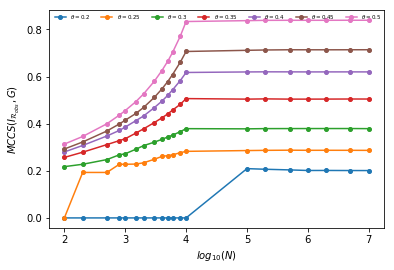

In [63]:
def read_from_txt(txt):
    x_lst = []
    y_lst = []
    budget_acc_lst = []
    step = 0
    with open(txt) as fp:
        for line in fp:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                x_lst.append(log10(float(r.group(1))))
                y_lst.append(float(r.group(2)))
    return x_lst, y_lst
theta_lst = [0.2,0.25,0.3,0.35,0.4,0.45,0.5]
x_obs_lst, x_ref_lst, y_obs_lst, y_ref_lst = [], [], [], []
for theta in theta_lst:
    x_obs, y_obs = read_from_txt('monte_carlo_sampling/MCCS_{}_obs.txt'.format(theta))
    x_ref, y_ref = read_from_txt('monte_carlo_sampling/MCCS_{}_ref.txt'.format(theta))
    
    x_obs_lst.append(x_obs)
    x_ref_lst.append(x_ref)
    y_obs_lst.append(y_obs)
    y_ref_lst.append(y_ref)


for i in range(len(theta_lst)):
    x_obs, x_ref, y_obs, y_ref = x_obs_lst[i], x_ref_lst[i], y_obs_lst[i], y_ref_lst[i]
    theta = theta_lst[i]
    plt.plot(x_obs, y_obs, marker='.', markersize=8, label=r'$\theta={}$'.format(theta))
    #plt.plot(x_ref[:20], y_ref[:20], 'bo-', label=r'$\theta={}$'.format(theta))

plt.legend(loc='best', ncol=len(theta_lst), shadow=True, 
           facecolor='white', framealpha=1,prop={'size': 5.5}, borderaxespad=0, frameon=False)
plt.xlabel(r'$log_{10}(N)$')
plt.ylabel(r'$MCCS(I_{\mathcal{R}_{obs}},G)$')
plt.savefig('MCCS.pdf', bbox_inches='tight', dpi=800, pad_inches=0)
plt.show()
plt.close()

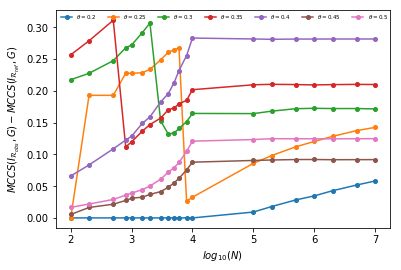

In [64]:
import numpy as np
import operator
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(theta_lst))]

for i in range(len(theta_lst)):
    x_obs, x_ref, y_obs, y_ref = x_obs_lst[i], x_ref_lst[i], y_obs_lst[i], y_ref_lst[i]
    theta = theta_lst[i]
    y_gap = list(map(operator.sub, y_obs, y_ref[:20]))
    plt.plot(x_obs, y_gap, label=r'$\theta={}$'.format(theta), marker='.', markersize=8)
    
plt.legend(loc='best', ncol=len(theta_lst), shadow=True, 
           facecolor='white', framealpha=1,prop={'size': 5.5}, borderaxespad=0, frameon=False)
plt.xlabel(r'$log_{10}(N)$')
plt.ylabel(r'$MCCS(I_{\mathcal{R}_{obs}},G)-MCCS(I_{\mathcal{R}_{ref}},G)$')
plt.savefig('MCCS_GAP.pdf', bbox_inches='tight', dpi=800, pad_inches=0)
plt.show()
plt.close()